# Problem 1: 

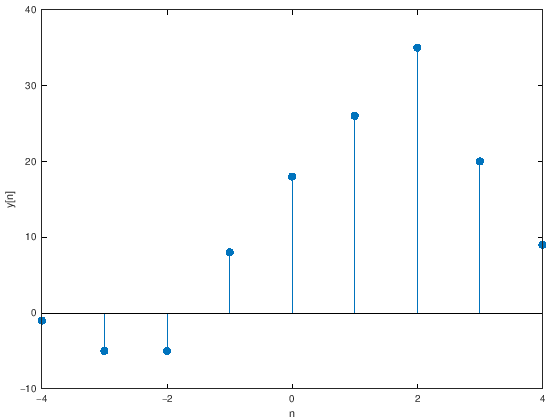

In [15]:
graphics_toolkit("gnuplot");
pkg load signal;
x = [-1, -2, 3, 4, 2, 9];
h = [1, 3, 2, 1];
n_x = -2:3;
n_h = -2:1;
y = conv(x, h);
n_y_start = n_x(1) + n_h(1);
n_y = n_y_start : n_y_start + length(y) - 1;
stem(n_y, y, 'filled', '.', 'Markersize', 20)
xlabel('n')
ylabel('y[n]')


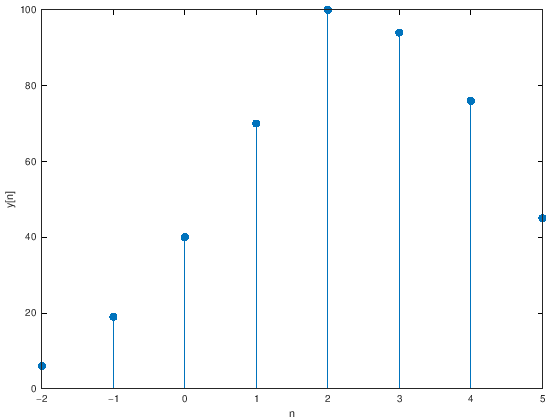

In [16]:
x = [1, 2, 3, 4, 5];
h = [6, 7, 8, 9];
n_x = -2:2;
n_h = 0:3;
y = conv(x, h);
n_y_start = n_x(1) + n_h(1);
n_y = n_y_start : n_y_start + length(y) - 1;
stem(n_y, y, 'filled', '.', 'Markersize', 20)
xlabel('n')
ylabel('y[n]')

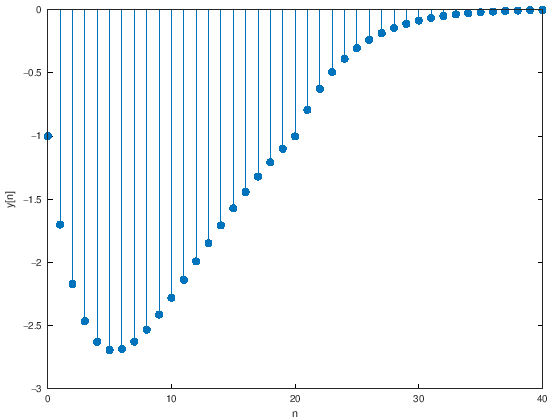

In [32]:
%% Define Heaviside function
function u = heaviside(n);
    u = (n>=0);
end
%% Compute convolution with range from 0 to 20
n = 0:20;
x = (0.8.^n).*heaviside(n);
h = (-0.9.^n).*heaviside(n);
y = conv(x, h);
n_y_start = n(1)*2;
n_y = n_y_start : n_y_start + length(y) - 1;
stem(n_y, y, 'filled', '.', 'Markersize', 20)
xlabel('n')
ylabel('y[n]')

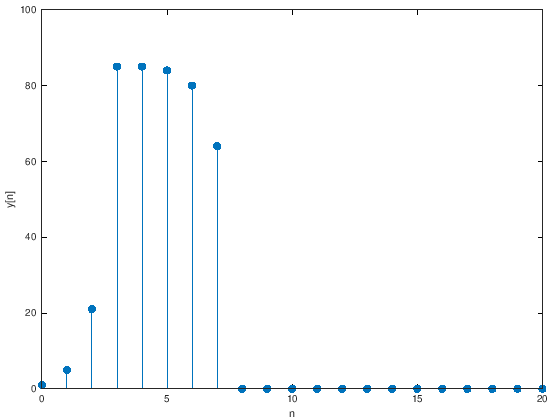

In [45]:
%% Define Heaviside step function
function u = heaviside(n)
    u = (n>=0);
end
%% Compute the convolution between two signals with a range from 0 to 10
n = 0:10;
x = (1/4).^(-n).*[heaviside(n+1)-heaviside(n-4)];
h = heaviside(n) - heaviside(n-5);
y = conv(x, h);
n_y_start = n(1)*2;
n_y = n_y_start : n_y_start + length(y) - 1;
stem(n_y, y, 'filled', '.', 'Markersize', 20)
xlabel('n')
ylabel('y[n]')

# Problem 2:

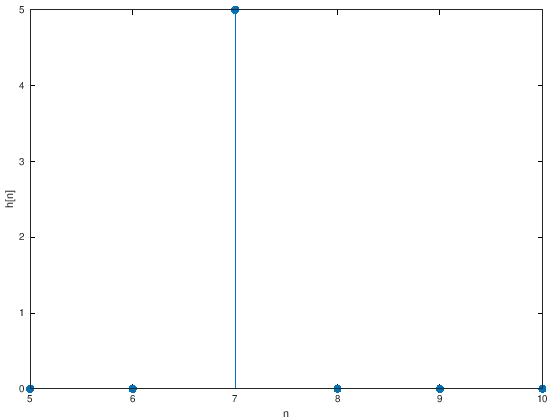

In [50]:
%% Define Kronecker impulse function
function d = delta(n);
    d = (n==0);
end
%% Plot h[n] with condition n = 5:10
n = 5:10;
h = 3*delta(n+2)+2*delta(n)-delta(n-3)+5*delta(n-7);
stem(n, h, '.', 'Markersize', 20)
xlabel('n')
ylabel('h[n]')

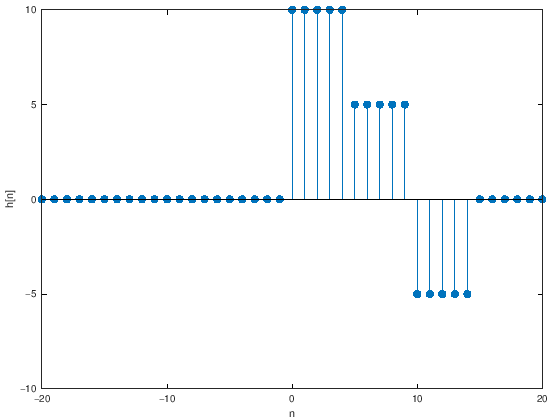

In [52]:
%% Define Heaviside function
function u = heaviside(n);
    u = (n>=0);
end
%% Plot h[n]
n = -20 : 20;
h = 10*heaviside(n)-5*heaviside(n-5)-10*heaviside(n-10)+5*heaviside(n-15);
stem(n, h, 'filled', '.', 'Markersize', 20)
xlabel('n')
ylabel('h[n]')
    

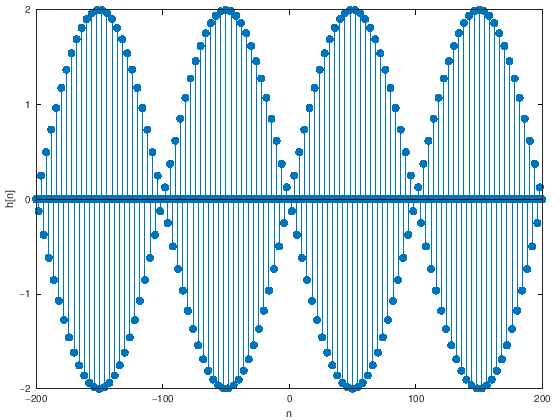

In [54]:
n = -200:200;
h = 2*sin(0.01*pi*n).*cos(0.5*pi*n);
stem(n, h, '.', 'Markersize', 20)
xlabel('n')
ylabel('h[n]')

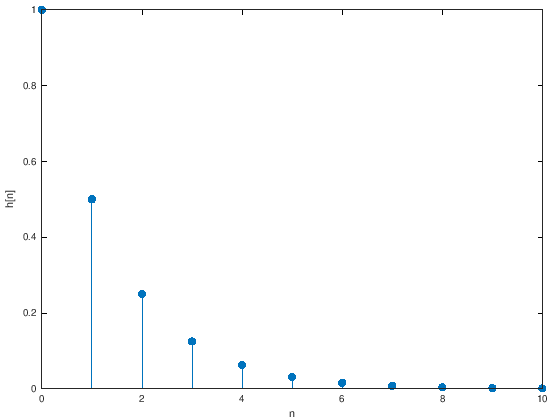

In [56]:
n = 0:10;
h = (1/2).^n;
stem(n, h, 'filled', '.','Markersize', 20)
xlabel('n')
ylabel('h[n]')

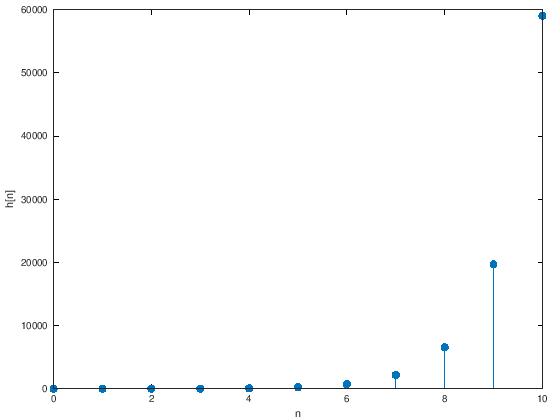

In [57]:
n = 0:10;
h = (3).^n;
stem(n, h, 'filled', '.','Markersize', 20)
xlabel('n')
ylabel('h[n]')

# Problem 3:

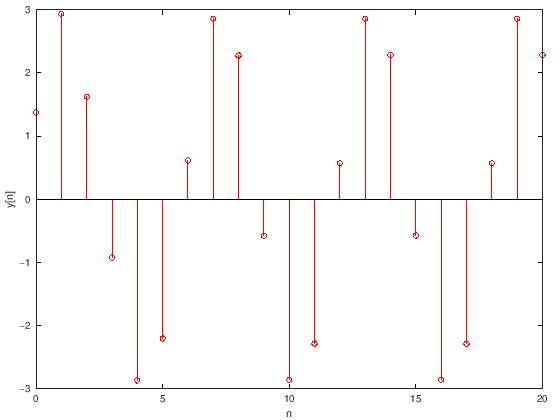

In [63]:
%% Define Heaviside function
function u = heaviside(n)
    u = (n>=0);
end
%% Output of LTI system with range 0:20
n = 0:20;
x = cos(n*pi/3).*heaviside(n);
a = [1, -1/2, 1/4, 0];
b = [1, 2, 0, 1];
zi = filtic(b, a, [1, 0.5, 0]);
y = filter(b, a, x, zi);
stem(n, y, 'r', 'Markersize', 5)
xlabel('n')
ylabel('y[n]')


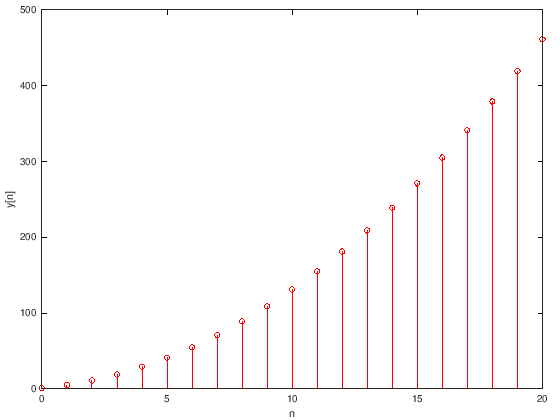

In [64]:
%% Define Heaviside function
function u = heaviside(n)
    u = (n>=0);
end
%% Output of LTI system with range 0:20
n = 0:20;
x = heaviside(n);
a = [1, -2, 1];
b = [1, 1, 0];
zi = filtic(b, a, [-1, -2]);
y = filter(b, a, x, zi);
stem(n, y, 'r', 'Markersize', 5)
xlabel('n')
ylabel('y[n]')

# Problem 4:

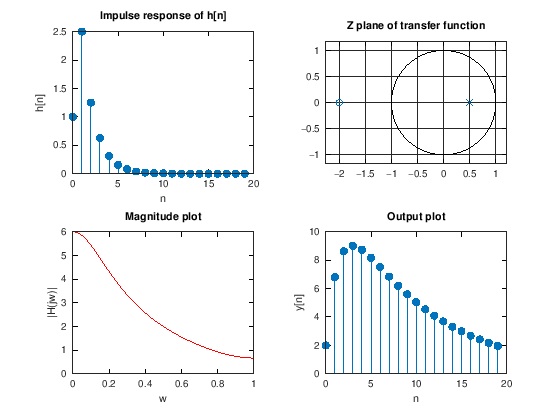

In [82]:
%% Draw impulse response h[n] and its Z plane
b = [1, 2];
a = [1, -0.5];
N = 20;
[h, n] = impz(b, a, N);
subplot(2, 2, 1)
stem(n, h, 'filled', '.', 'Markersize', 20)
xlabel('n')
ylabel('h[n]')
title('Impulse response of h[n]')
subplot(2, 2, 2)
zplane(b, a)
title('Z plane of transfer function')
% Because this is a stable system (all poles are inside unit circle), so we will determine frequency response and
% plot its magnitude
subplot(2, 2, 3)
[H, w] = freqz(b, a, 512);
plot(w/pi, abs(H), 'r', 'LineWidth', 2)
title('Magnitude plot')
xlabel('w')
ylabel('|H(jw)|')
%% If the input signal is x[n], then the output is:
x = 2*(0.9).^n.*(n>=0);
y = filter(b, a, x);
subplot(2, 2, 4)
stem(n, y, '.', 'Markersize', 20)
title('Output plot')
xlabel('n')
ylabel('y[n]')

# Problem 5:

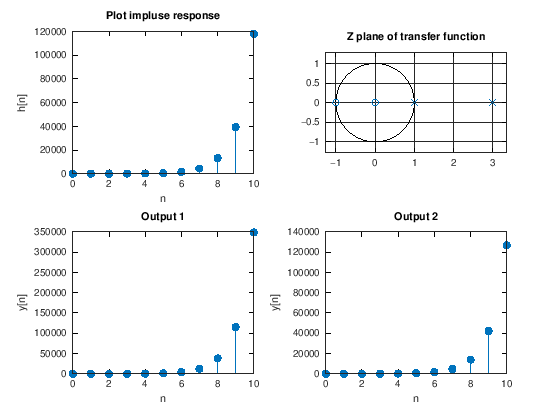

In [96]:
%% Define Kronecker impulse
function d = delta(n);
    d = (n==0);
end
%% Plot impulse response
b = [1, 1];
a = [1, -4, 3];
n = 0:10;
h = filter(b, a, delta(n));
subplot(2, 2, 1)
stem(n, h, '.', 'Markersize', 20)
title('Plot impluse response')
xlabel('n')
ylabel('h[n]')
subplot(2, 2, 2)
zplane(b, a)
title('Z plane of transfer function')
%% System is UNSTABLE because it has pole z = 1
x_1 = 2.^n.*(n>=0);
subplot(2, 2, 3)
y_1 = filter(b, a, x_1);
stem(n, y_1, '.', 'Markersize', 20)
xlabel('n')
ylabel('y[n]')
title('Output 1')
x_2 = cos(n*pi/3).*(n>=0);
subplot(2, 2, 4)
y_2 = filter(b, a, x_2);
stem(n, y_2, '.', 'Markersize', 20)
xlabel('n')
ylabel('y[n]')
title('Output 2')

# Problem 6

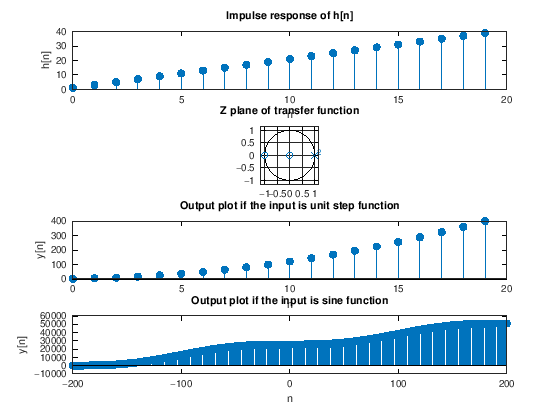

In [101]:
%% Draw impulse response h[n] and its Z plane
b = [1, 1];
a = [1, -2, 1];
N = 20;
[h, n] = impz(b, a, N);
subplot(4, 1, 1)
stem(n, h, 'filled', '.', 'Markersize', 20)
xlabel('n')
ylabel('h[n]')
title('Impulse response of h[n]')
subplot(4, 1, 2)
zplane(b, a)
title('Z plane of transfer function')
% System is UNSTABLE
% If the input signal is u[n], then the output is:
x = (n>=0);
y = filter(b, a, x);
subplot(4, 1, 3)
stem(n, y, '.', 'Markersize', 20)
title('Output plot if the input is unit step function')
xlabel('n')
ylabel('y[n]')
% If the input signal is x[n] = 2sin(0.01pi*n), then the output is:
n = -200:200;
x = 2*sin(0.01*pi*n);
y = filter(b, a, x);
subplot(4, 1, 4)
stem(n, y, '.', 'Markersize', 20)
title('Output plot if the input is sine function')
xlabel('n')
ylabel('y[n]')

# Problem 7

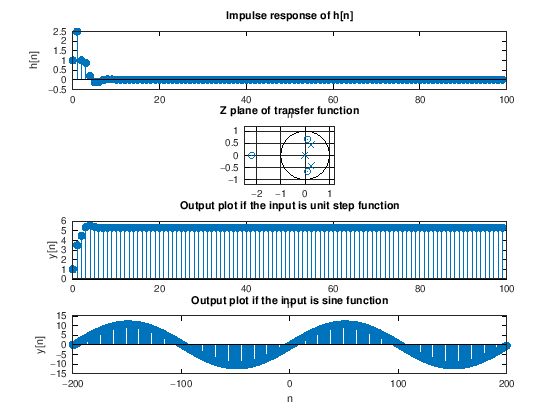

In [103]:
%% Draw impulse response h[n] and its Z plane
b = [1, 2, 0, 1];
a = [1, -0.5, 0.25, 0];
N = 100;
[h, n] = impz(b, a, N);
subplot(3, 1, 1)
stem(n, h, 'filled', '.', 'Markersize', 20)
xlabel('n')
ylabel('h[n]')
title('Impulse response of h[n]')
subplot(3, 1, 2)
zplane(b, a)
title('Z plane of transfer function')
% System is stable
% If the input signal is x[n] = 2sin(0.01pi*n), then the output is:
n = 0:200;
x = 2*sin(0.01*pi*n);
y = filter(b, a, x);
subplot(3, 1, 3)
stem(n, y, '.', 'Markersize', 20)
title('Output plot if the input is sine function')
xlabel('n')
ylabel('y[n]')